# Note, for this program, we are using the allStar-dr17-synspec_rev1.fits file. This is because the original DR17 release of the allStar file had mistakes with the LSF on over 100k LCO stars. This file accounts for these issues, and includes these additional objects

In [1]:
#Importing packages and downloading the allStar file

import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


hdulist = fits.open("allStar-dr17-synspec_rev1.fits")
hdu = hdulist[1]
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5410 / length of dimension 1                          
NAXIS2  =               733901 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  234 / number of table fields                         
TTYPE1  = 'FILE    '                                                            
TFORM1  = '64A     '                                                            
TTYPE2  = 'APOGEE_ID'                                                           
TFORM2  = '30A     '                                                            
TTYPE3  = 'TARGET_ID'       

In [2]:
#Extracting pertinent information about the objects

LocationID = hdu.header['TTYPE7']
LocationData = hdu.data[LocationID]

FieldID = hdu.header['TTYPE8']
FieldIDdata = hdu.data[FieldID]

Telescope = hdu.header['TTYPE6']
Telescopedata = hdu.data[Telescope]

SDSSID = hdu.header['TTYPE2']
SDSSIDdata = hdu.data[SDSSID]

GAIAID = hdu.header['TTYPE83']
GAIAIDdata = hdu.data[GAIAID]

nvisits = hdu.header['TTYPE57']
nvisitsdata = hdu.data[nvisits]
#number of visits (doppler)

S_N = hdu.header['TTYPE59']
S_N_data = hdu.data[S_N]
#signal-to-noise

J_mag = hdu.header['TTYPE14']
Jdata = hdu.data[J_mag]
#2MASS J mag

J_err = hdu.header['TTYPE15']
Jerrdata = hdu.data[J_err]
#2MASS J error

H_mag = hdu.header['TTYPE16']
Hdata = hdu.data[H_mag]
#2MASS H mag

H_err = hdu.header['TTYPE17']
Herrdata = hdu.data[H_err]
#2MASS H error

K_mag = hdu.header['TTYPE18']
Kdata = hdu.data[K_mag]
#2MASS Ks mag

K_err = hdu.header['TTYPE19']
Kerrdata = hdu.data[K_err]
#2MASS Ks error

ra = hdu.header['TTYPE10']
radata = hdu.data[ra]
#right accension

d = hdu.header['TTYPE11']
ddata = hdu.data[d]
#declination

starflag = hdu.header['TTYPE60']
starflagdata = hdu.data[starflag]
#starflags in bitwise

starflags = hdu.header['TTYPE61']
starflagsdata = hdu.data[starflags]
#starflags in english

aspflag = hdu.header['TTYPE110']
aspflagdata = hdu.data[aspflag]
#aspcapflags in bitwise

aspflags = hdu.header['TTYPE111']
aspflagsdata = hdu.data[aspflags]
#aspcapflags in english

teff = hdu.header['TTYPE129']
teffdata = hdu.data[teff]
#effective temperature

tefferr = hdu.header['TTYPE130']
tefferrdata = hdu.data[tefferr]
#effective temperature error

logg = hdu.header['TTYPE131']
loggdata = hdu.data[logg]
#surface gravity

loggerr = hdu.header['TTYPE132']
loggerrdata = hdu.data[loggerr]
#surface gravity error

vscatter = hdu.header['TTYPE65']
vscatterdata = hdu.data[vscatter]
#v_scatter parameter

vsini = hdu.header['TTYPE139']
vsinidata = hdu.data[vsini]
#vsin(i) paramater

SLs = hdu.header['TTYPE76']
SLsdata = hdu.data[SLs]
#number of spectral lines from doppler fit

FE_H = hdu.header['TTYPE210']
FE_Hdata = hdu.data[FE_H]
#Fe/H

FE_Herr = hdu.header['TTYPE211']
FE_Herrdata = hdu.data[FE_Herr]
#Fe/H error


In [3]:
#Reducing the data files to DF sizing

LocationID_1 = LocationData.reshape(733901,1)
FieldID_1 = FieldIDdata.reshape(733901,1)
Telescope_1 = Telescopedata.reshape(733901,1)
SDSSID_1 = SDSSIDdata.reshape(733901,1)
GAIAID_1 = GAIAIDdata.reshape(733901,1)
nvisits_1 = nvisitsdata.reshape(733901, 1)
S_N_1 = S_N_data.reshape(733901,1)
J1 = Jdata.reshape(733901,1)
Je1 = Jerrdata.reshape(733901,1)
H1 = Hdata.reshape(733901,1)
He1 = Herrdata.reshape(733901,1)
K1 = Kdata.reshape(733901,1)
Ke1 = Kerrdata.reshape(733901,1)
ra_1 = radata.reshape(733901,1)
d_1 = ddata.reshape(733901,1)
flagsbit = starflagdata.reshape(733901,1)
flagseng = starflagsdata.reshape(733901,1)
teff_1 = teffdata.reshape(733901, 1)
tefferr_1 = tefferrdata.reshape(733901, 1)
logg_1 = loggdata.reshape(733901, 1)
loggerr_1 = loggerrdata.reshape(733901, 1)
vscatter_1 = vscatterdata.reshape(733901, 1)
vsini_1 = vsinidata.reshape(733901,1)
SLs_1 = SLsdata.reshape(733901,1)
FE_H1 = FE_Hdata.reshape(733901,1)
FE_Herr1 = FE_Herrdata.reshape(733901,1)
aspbit = aspflagdata.reshape(733901,1)
aspeng = aspflagsdata.reshape(733901,1)

LocationID_final = np.concatenate(LocationID_1)
FieldID_final = np.concatenate(FieldID_1)
Telescope_final = np.concatenate(Telescope_1)
SDSSID_final = np.concatenate(SDSSID_1)
GAIAID_final = np.concatenate(GAIAID_1)
nvisits_final = np.concatenate(nvisits_1)
S_N_final = np.concatenate(S_N_1)
Jfinal = np.concatenate(J1)
Jerrfinal = np.concatenate(Je1)
Hfinal = np.concatenate(H1)
Herrfinal = np.concatenate(He1)
Kfinal = np.concatenate(K1)
Kerrfinal = np.concatenate(Ke1)
ra_final = np.concatenate(ra_1)
d_final = np.concatenate(d_1)
starbitfinal = np.concatenate(flagsbit)
starengfinal = np.concatenate(flagseng)
teff_final = np.concatenate(teff_1)
tefferr_final = np.concatenate(tefferr_1)
logg_final = np.concatenate(logg_1)
loggerr_final = np.concatenate(loggerr_1)
vscatter_final = np.concatenate(vscatter_1)
vsini_final = np.concatenate(vsini_1)
SLs_final = np.concatenate(SLs_1)
FE_Hfinal = np.concatenate(FE_H1)
FE_Herrfinal = np.concatenate(FE_Herr1)
ASPCAPbitfinal = np.concatenate(aspbit)
ASPCAPengfinal = np.concatenate(aspeng)

In [4]:
# Initialize the DF with all the above information

df1 = pd.DataFrame({'Location ID':LocationID_final,'Field':FieldID_final,'Telescope': Telescope_final,'SDSS ID':SDSSID_final, 
                    'Gaia ID': GAIAID_final,'nvisits': nvisits_final, 'Signal-to-noise': S_N_final, 'J-Band Magnitude': Jfinal,
                    'J-Band Error': Jerrfinal, 'H-Band Magnitude': Hfinal, 'H-Band Error': Herrfinal,'K-Band Magnitude': Kfinal,
                    'K-Band Error': Kerrfinal,'RA':ra_final, 'Dec': d_final, 'Star Flags (bitwise)': starbitfinal, 
                    'Star Flags (spelled)': starengfinal, 'ASPCAP Flags (bitwise)': ASPCAPbitfinal, 
                    'ASPCAP Flags (spelled)': ASPCAPengfinal, 'teff': teff_final, 'Effective Temperature Error': tefferr_final,
                    'logg': logg_final, 'Log(g) Error': loggerr_final, 'vscatter': vscatter_final, 'vsini': vsini_final, 
                    'SLs': SLs_final, 'FE/H': FE_Hfinal, 'FE/H Error': FE_Herrfinal})

# Reduce the initial DF to only those with the following parameter values

df2 = df1.query('nvisits >= 2 & vscatter >= 1 & SLs==1 & teff > 3000 & teff < 7000 & logg > 3.6 & logg < 4.5 & vsini>10')

In [ ]:
df2['Field'].size
#df2.tocsv(r'all of the stars from apogee 2-11.csv')

In [ ]:
#df3 = pd.read_csv(r'radii.csv')
#len(df3)
#df4 = df2[["SDSS ID", "Gaia ID"]]
#df
#for i in range (len(df3)):
 #   current_radius = df3["radius"][i]
  #  current_ID = df3["starID"][i]
   # for j in range (len(df4)):
    #    current_VAR_SDSS = df4['SDSS ID'][j]
     #   current_VAR_Gaia = df4["Gaia ID"][j]
      #  if current_ID == current_VAR_SDSS
#print(df4)

In [ ]:
# Import the high mass ratio objects from the Troup et al. 2016 Gold Sample, and add them to the 
# catalog of the objects 

# data2 = pd.read_csv("Troup et al. 2016 (YES RED CLUMP) Final.csv")
# troupstars = df1[df1['SDSS ID'].isin(data2['APOGEE_ID'])]
# df3 = pd.concat([df2, troupstars], axis=0, join="outer")
# df3['Location ID'].size

<IPython.core.display.Javascript object>


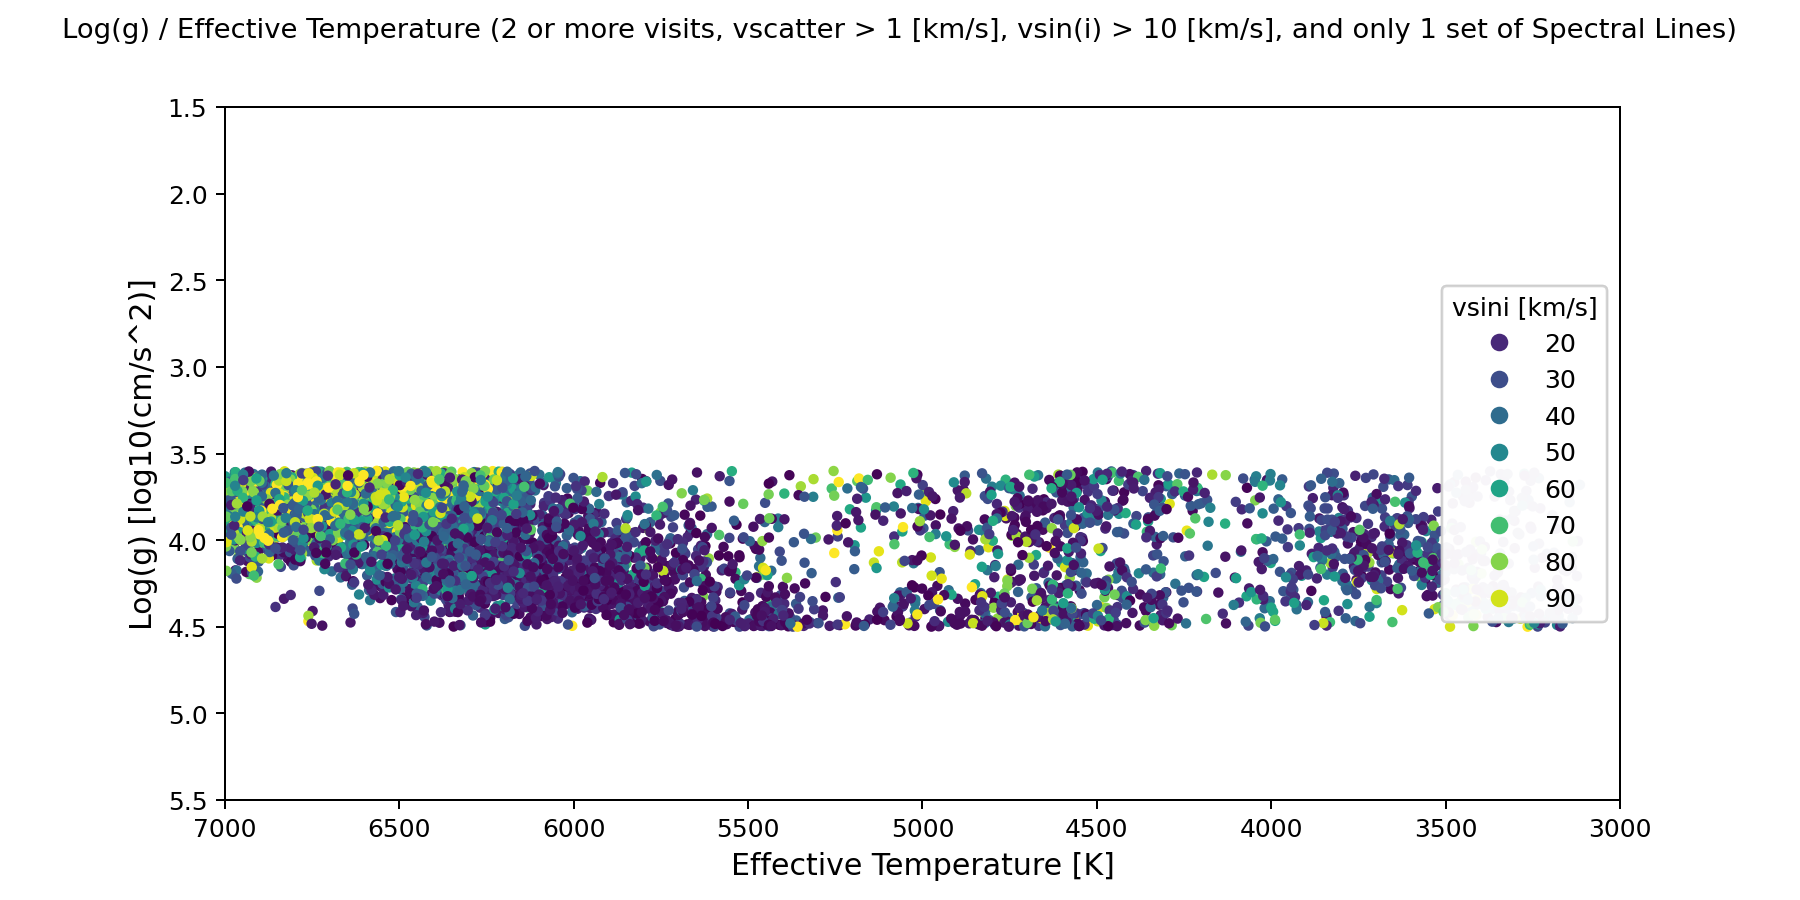

In [5]:
#Plotting all the objects

%matplotlib notebook

fig, ax = plt.subplots(figsize=(10, 5))
sizer = 10
scatter = ax.scatter(df2.teff, df2.logg, c= df2.vsini, label = 'Teff/Logg', s=sizer)
ax.set_xlim([7000,3000])
ax.set_ylim([5.5, 1.5])
fig.suptitle('Log(g) / Effective Temperature (2 or more visits, vscatter > 1 [km/s], vsin(i) > 10 [km/s], and only 1 set of Spectral Lines)', fontsize=11)
plt.xlabel('Effective Temperature [K]', fontsize=12)
plt.ylabel('Log(g) [log10(cm/s^2)]', fontsize=12)
legend = ax.legend(*scatter.legend_elements(),loc="center right", title="vsini [km/s]")
ax.add_artist(legend)
fig.show()

In [6]:
#Export to CSV

df2.to_csv(r'Targets+2_12.csv')

In [7]:
df2

,Location ID,Field,Telescope,SDSS ID,Gaia ID,nvisits,Signal-to-noise,J-Band Magnitude,J-Band Error,H-Band Magnitude,...,ASPCAP Flags (spelled),teff,Effective Temperature Error,logg,Log(g) Error,vscatter,vsini,SLs,FE/H,FE/H Error
23,4287,120+12,apo25m,2M00000662+7528598,539684085518533504,9,773.234985,9.435,0.027,9.268,...,"VMICRO_WARN,N_M_WARN,STAR_WARN,COLORTE_WARN",6948.582520,66.630348,3.883139,0.023815,2.006593,37.033951,1,NaN,NaN
193,5218,100-60,apo25m,2M00005343+0040594,2738248909142217600,4,95.417015,11.193,0.023,10.910,...,"LOGG_WARN,VMICRO_WARN,STAR_WARN",6045.200684,49.525173,4.453109,0.034854,4.180007,20.137243,1,-0.136960,-0.136960
520,4548,105-45,apo25m,2M00020972+1612294,2772431905312063104,3,548.875732,9.211,0.019,9.077,...,"VMICRO_WARN,N_M_WARN,VSINI_WARN",6925.882812,75.828453,3.786097,0.029353,10.923258,53.112904,1,NaN,NaN
521,2897,107-46_MGA,apo25m,2M00020972+1612294,2772431905312063104,2,196.888916,9.211,0.019,9.077,...,"VMICRO_WARN,N_M_WARN,VSINI_WARN",6674.736328,64.904312,3.734142,0.029499,14.031831,56.221184,1,-0.274090,-0.274090
556,5218,100-60,apo25m,2M00021917+0142107,2738655354783502080,4,243.988724,10.456,0.023,9.996,...,"VMICRO_WARN,N_M_WARN",4819.530273,14.205135,4.449954,0.020621,1.507434,11.972918,1,-0.171120,-0.171120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733572,4264,N7789,apo25m,2M23582919+5601109,1994738569261182080,3,77.150215,12.300,0.023,12.021,...,,5979.677734,61.388924,4.159441,0.054019,2.986133,12.557406,1,-0.018182,-0.018182
733710,4287,120+12,apo25m,2M23591060+7448266,2229206503298163584,9,1993.943237,7.273,0.018,7.212,...,"VMICRO_WARN,C_M_WARN,N_M_WARN,VSINI_WARN",6669.306152,55.047024,3.905743,0.023300,13.648273,66.160690,1,0.051643,0.051643
733754,4548,105-45,apo25m,2M23592268+1714293,2773673906774562688,3,310.058868,9.839,0.022,9.620,...,,6459.961426,55.675426,3.856124,0.029318,3.040208,31.521002,1,-0.235250,-0.235250
733848,7218,SMC12,lco25m,2M23594797-7254435,6380061394361042048,12,896.137451,9.818,0.024,9.682,...,"VMICRO_WARN,VSINI_WARN",6503.821777,45.777061,3.914288,0.020989,12.275522,86.317734,1,0.097861,0.097861
